<a href="https://colab.research.google.com/github/fatima2020-lab/Simulacion-I/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Crudo

Valor exacto de la integral: 0.6298233442079734 y el Error estimado: 3.482769628249116e-13


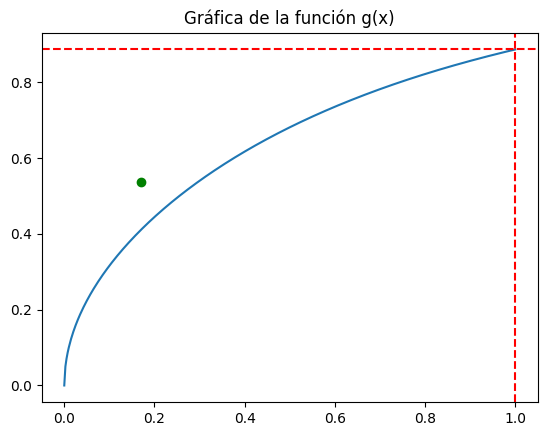

Estimación de la integral con 1000 muestras: 0.6394
Error estimado: 0.0064


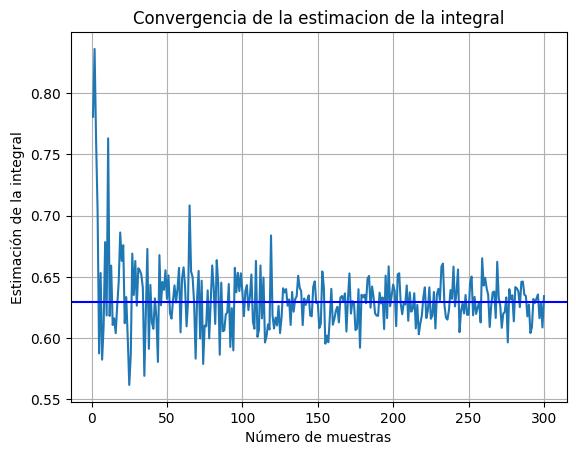

In [43]:
# Monte Carlo Crudo.

import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.integrate import quad

# Definir la integral de la funcion dada
def g(x):
    return np.sqrt(np.arctan(x))

integral_e, error_e = quad(g, 0, 1)
print(f"Valor exacto de la integral: {integral_e} y el Error estimado: {error_e}")

# Gráfica de la función
x = np.linspace(0, 1, 400)
y = g(x)

u1 = random.random()  # Generar numeros aleatorios para u1
u2 = random.random()  # Generar números aleatorios para u2

plt.plot(x, y, label="g(x) = sqrt(arctan(x))")
plt.axhline(g(1), color="red", linestyle="--", label="y = g(1)")
plt.axvline(1, color="red", linestyle="--", label="x = 1")
plt.scatter(u1, u2, color="green", label="Punto aleatorio")
plt.title("Gráfica de la función g(x)")

plt.show()

# Función del método de Monte Carlo crudo
def monte_carlo(n):
  """ Aproxima la integrla de g(x) en [0,1] usando Monte Carlo"""
  x_random = np.random.uniform(0, 1, n)  # Generando n valores aleatorios
  estimacion = np.mean(g(x_random))  # Calculo de la media

  # Error estandar de Monte Carlo
  sigma = np.std(g(x_random)) / np.sqrt(n)

  return estimacion, sigma

# Número de muestras
n_muestras = 1000

# Llamar a la funcion Monte Carlo

estimacion, error =monte_carlo(n_muestras)

# Resultados
print(f"Estimación de la integral con {n_muestras} muestras: {estimacion:.4f}")
print(f"Error estimado: {error:.4f}")

# Función para realizar multiples experimentos y graficar la convergencia
def experimentos(m):
    """ Ejecutar m experimentos con lanzamientos y almacena las probabilidades"""
    estimaciones = []
    for i in range(1, m + 1):
        estimacion, _ = monte_carlo(i)
        estimaciones.append(estimacion)
    return estimaciones


# Ejecutar los experimentos y graficarlos
m = 300  # nuúmero de experimentos
lista_estimacion = experimentos(m)

plt.plot(range(1,m+1), lista_estimacion, label="Estimación Monte Carlo")
plt.axhline(y=integral_e, color="blue")
plt.title("Convergencia de la estimacion de la integral")
plt.xlabel("Número de muestras")
plt.ylabel("Estimación de la integral")
plt.grid(True)
plt.show()